In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


This is An Analysis for Smartphones

Importing Dataset.

In [44]:
df = pd.read_csv("D:\\Smartphones_cleaned_dataset.csv", lineterminator= '\n')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height\r
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


Showing coloumns and basic info

In [45]:
print('Columns :\n', df.columns)
print('\n')
df.info()

Columns :
 Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height\r'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                  

Now we keep only necessary columns that are needed for analysis and delete all from datasets.

In [46]:
col_to_keep = ['brand_name', 'model', 'price', 'ram_capacity', 'has_5g', 'extended_memory_available', 'processor_brand', 'rating']
df = df.drop(columns=[
    col for col in df.columns
            if col not in col_to_keep

])
df.head()

,brand_name,model,price,rating,has_5g,processor_brand,ram_capacity,extended_memory_available
0,oneplus,OnePlus 11 5G,54999,89.0,True,snapdragon,12,0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,snapdragon,6,1
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,exynos,4,1
3,motorola,Motorola Moto G62 5G,14999,81.0,True,snapdragon,6,1
4,realme,Realme 10 Pro Plus,24999,82.0,True,dimensity,6,0


checking null values 

IF there is null valuse is our datasets it shows an error. That's why we have to remove all null which can shows an error.

In [47]:
df.info()
print('NULL valuse')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   processor_brand            960 non-null    object 
 6   ram_capacity               980 non-null    int64  
 7   extended_memory_available  980 non-null    int64  
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 54.7+ KB
NULL valuse


brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
processor_brand               20
ram_capacity                   0
extended_memory_available      0
dtype: int64

as we can see above "rating" and "processor_brand" have a null values which count is corresponding 101 and 20 

In [48]:
df = df.dropna(subset= ["rating", "processor_brand"])
df.isna().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
processor_brand              0
ram_capacity                 0
extended_memory_available    0
dtype: int64

Now we check Value count for for columns and 
change "has_5g" boolean to String with '5G' if True and '4G' if False
and "extended_memory_available" integer to string "yes" if 1 and "No" if 0 which is easy and more readalble fro non-tech individuals

In [49]:
print(df.nunique(),'\n')
print(df['has_5g'].value_counts(),'\n')

df['extended_memory_available'].value_counts()

brand_name                    42
model                        862
price                        327
rating                        30
has_5g                         2
processor_brand               10
ram_capacity                   8
extended_memory_available      2
dtype: int64 

has_5g
True     486
False    376
Name: count, dtype: int64 



extended_memory_available
1    556
0    306
Name: count, dtype: int64

In [50]:
df['has_5g'] = df["has_5g"].replace({True:"5G",False:"4G"})
print(df["has_5g"].dtype)
df.head()

object


,brand_name,model,price,rating,has_5g,processor_brand,ram_capacity,extended_memory_available
0,oneplus,OnePlus 11 5G,54999,89.0,5G,snapdragon,12,0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,5G,snapdragon,6,1
2,samsung,Samsung Galaxy A14 5G,16499,75.0,5G,exynos,4,1
3,motorola,Motorola Moto G62 5G,14999,81.0,5G,snapdragon,6,1
4,realme,Realme 10 Pro Plus,24999,82.0,5G,dimensity,6,0


In [51]:
df['extended_memory_available'] = df['extended_memory_available'].replace({
    1:'Extendable',0:'Not extendable'
})
df.head()

,brand_name,model,price,rating,has_5g,processor_brand,ram_capacity,extended_memory_available
0,oneplus,OnePlus 11 5G,54999,89.0,5G,snapdragon,12,Not extendable
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,5G,snapdragon,6,Extendable
2,samsung,Samsung Galaxy A14 5G,16499,75.0,5G,exynos,4,Extendable
3,motorola,Motorola Moto G62 5G,14999,81.0,5G,snapdragon,6,Extendable
4,realme,Realme 10 Pro Plus,24999,82.0,5G,dimensity,6,Not extendable


In [52]:
top_under_25k_budget = df[df['price']<=25000].sort_values(by= 'rating',ascending=False)
top_under_25k_budget.head(5)

,brand_name,model,price,rating,has_5g,processor_brand,ram_capacity,extended_memory_available
239,xiaomi,Xiaomi Redmi Note 12 Explorer,24999,89.0,5G,dimensity,8,Extendable
135,xiaomi,Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 25...,22999,87.0,5G,snapdragon,8,Extendable
251,infinix,Infinix Zero 20,17999,87.0,4G,helio,8,Extendable
42,motorola,Motorola Edge 20 Fusion 5G,18999,87.0,5G,dimensity,6,Extendable
719,motorola,Motorola Edge S,22490,87.0,5G,snapdragon,6,Extendable


In [53]:
best_5g_support = df[
    (df['price'] >= 20000) & (df['price'] <= 35000) & (df['has_5g'] == '5G')
    ].sort_values(by='price')
best_5g_support[['brand_name', 'model', 'price']]

,brand_name,model,price
171,realme,Realme Narzo 50 Pro 5G,20490
170,xiaomi,Xiaomi Redmi Note 13 Pro Max 5G,20499
186,motorola,Motorola Moto G82 (8GB RAM + 128GB),20499
254,oppo,OPPO A1 Pro,20990
343,oneplus,OnePlus Nord N20 5G,20990
...,...,...,...
425,nokia,Nokia X50 5G,34999
397,realme,Realme GT Neo 5,34999
460,nubia,Nubia Z50,34999
640,oneplus,OnePlus Nord 5,34999


C:\Users\daffy\AppData\Local\Temp\ipykernel_16180\1468345681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts,


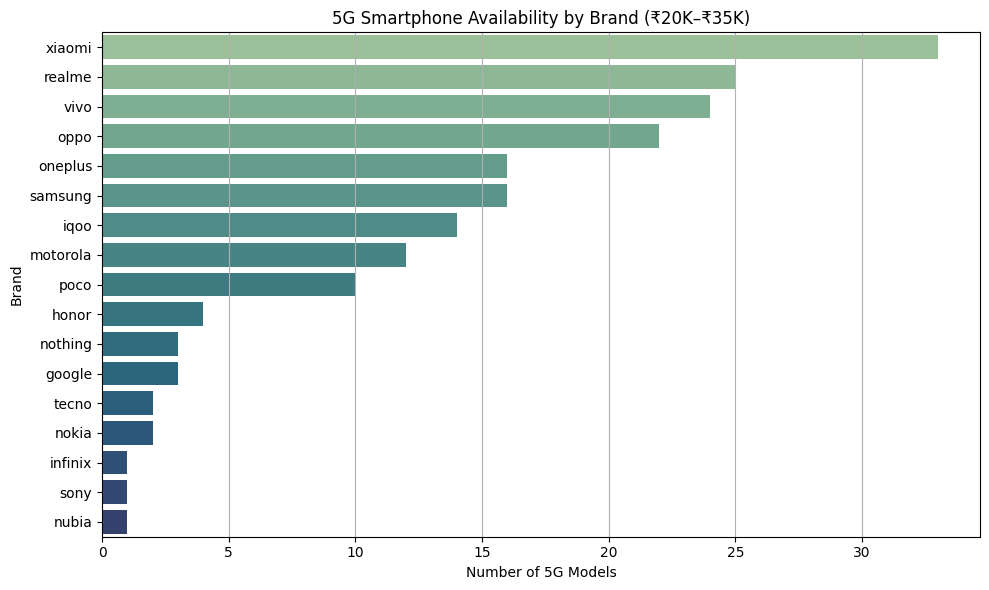

In [54]:
brand_counts = best_5g_support['brand_name'].value_counts().reset_index()
brand_counts.columns = ['brand_name', 'count']


plt.figure(figsize=(10,6))
sns.barplot(data=brand_counts,
            x= "count", y = 'brand_name',
            palette='crest'
            )
plt.title("5G Smartphone Availability by Brand (₹20K–₹35K)")
plt.xlabel("Number of 5G Models")
plt.ylabel("Brand")
plt.grid(True,axis="x")
plt.tight_layout()
plt.show()

In [55]:
above_40k = df[df['price']>=40000]
high_seg_brands= above_40k['processor_brand'].value_counts().reset_index()
high_seg_brands.columns =['processor_name', 'count']
print(high_seg_brands)


  processor_name  count
0     snapdragon     70
1         bionic     41
2      dimensity     18
3         exynos     12
4         google      5
5          kirin      1


C:\Users\daffy\AppData\Local\Temp\ipykernel_16180\3186965550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


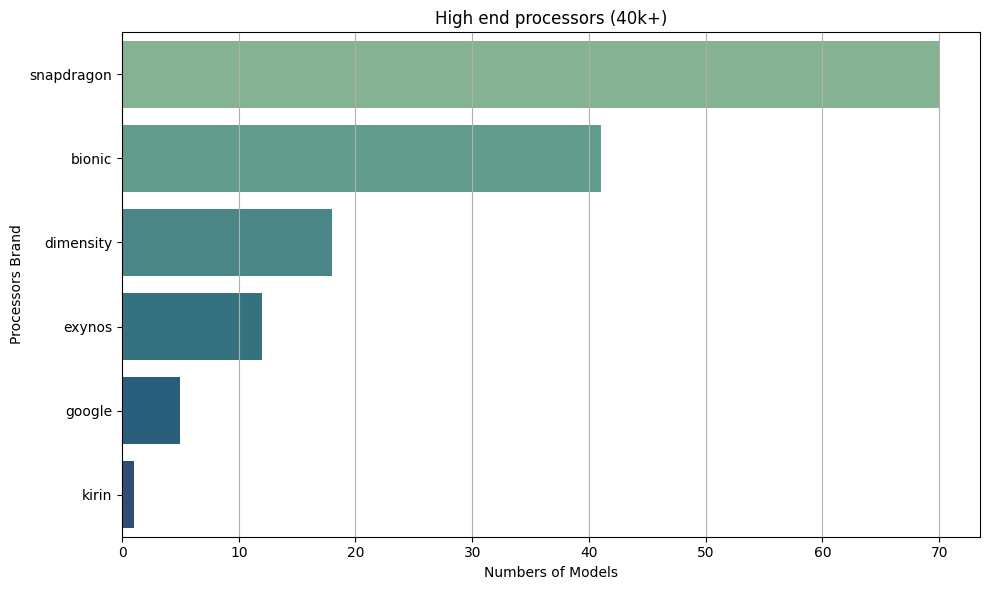

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(
    data= high_seg_brands, x='count', y= 'processor_name',palette='crest'
)
plt.title("High end processors (40k+)")
plt.xlabel('Numbers of Models')
plt.ylabel('Processors Brand')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

In [57]:
ext_main = df[(df['extended_memory_available']=='Extendable')& (df['ram_capacity']>=6)]
ext = ext_main['ram_capacity'].value_counts().reset_index()
ext.columns=['ram','Count']


ext

,ram,Count
0,6,175
1,8,139
2,12,10


C:\Users\daffy\AppData\Local\Temp\ipykernel_16180\3423408200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


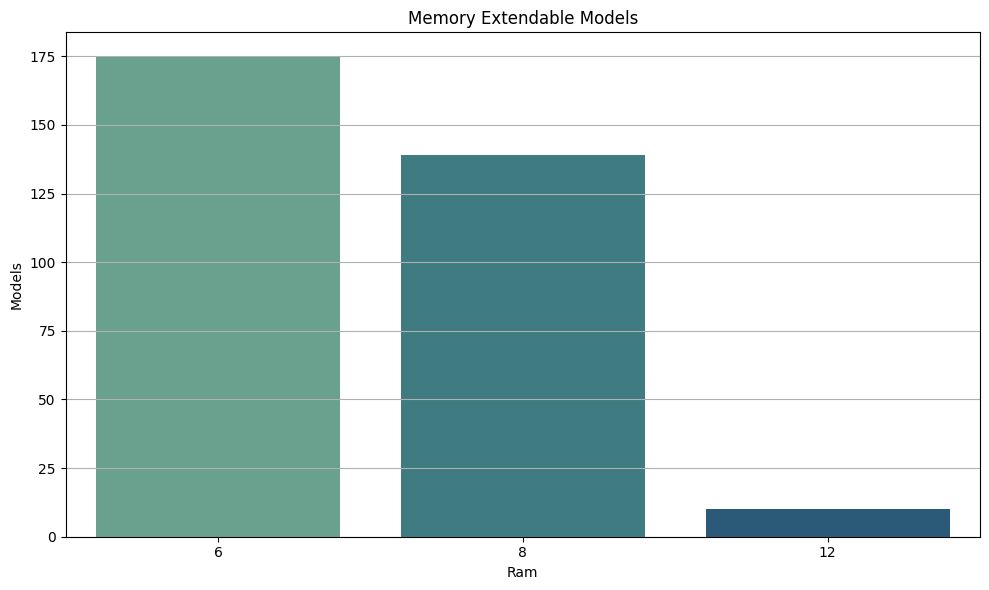

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=ext, x ='ram',y='Count', palette='crest'
)
plt.xlabel('Ram')
plt.ylabel('Models')
plt.title("Memory Extendable Models")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [59]:
brand_and_price = df[['brand_name','price']]

brand_avg_price = brand_and_price.groupby('brand_name').mean().reset_index()
brand_avg_price




,brand_name,price
0,apple,98126.590909
1,asus,69162.666667
2,blackview,8990.000000
3,blu,14990.000000
4,cola,14999.000000
5,doogee,30499.000000
6,gionee,7499.000000
7,google,38246.416667
8,honor,22176.727273
9,huawei,66287.700000


C:\Users\daffy\AppData\Local\Temp\ipykernel_16180\509083734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


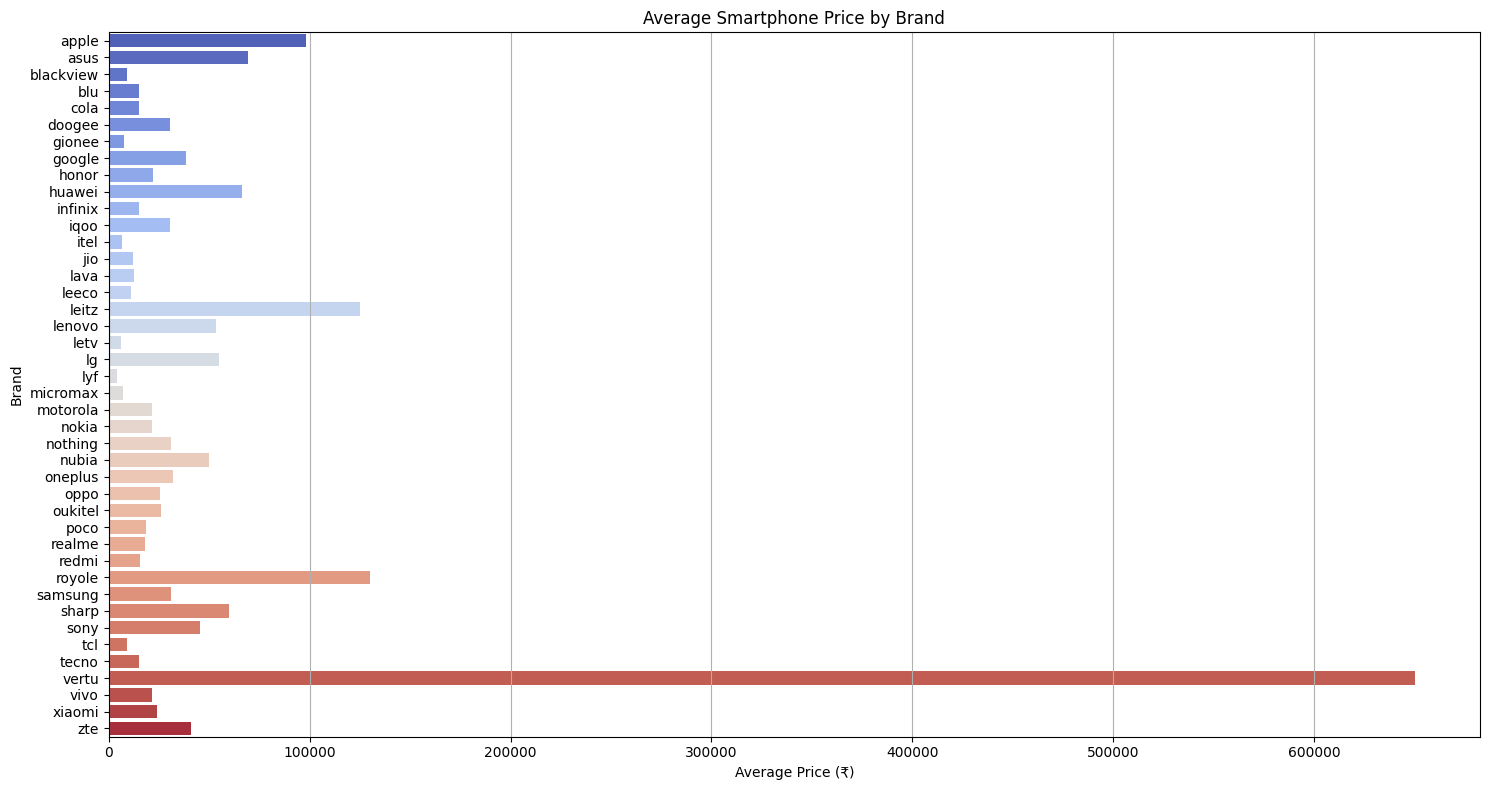

In [60]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=brand_avg_price,
    x='price', y='brand_name',
    palette='coolwarm'
)
plt.xlabel("Average Price (₹)")
plt.ylabel("Brand")
plt.title("Average Smartphone Price by Brand")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
